In [1]:
import pandas as pd
import scanpy as sc
import squidpy as sq
import numpy as np
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import anndata as ad

from bin import load_bgi
from bin import SCC
from bin import GraphCluster

In [31]:
cdata = ad.read_h5ad("./RNA/Multitime.h5")
adata_1 = cdata[cdata.obs["time_point"] == "1", :] # day 3
adata_2 = cdata[cdata.obs["time_point"] == "2", :] # day 7
adata_3 = cdata[cdata.obs["time_point"] == "3", :] # day 10

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_qc.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


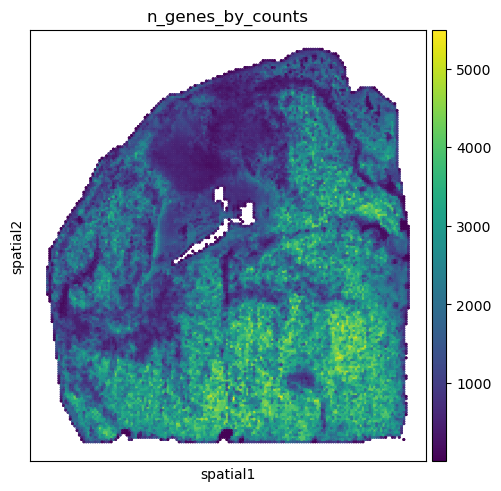

In [33]:
sc.pp.calculate_qc_metrics(adata_3,percent_top=None, log1p=False, inplace=True)
sq.pl.spatial_scatter(adata_3, color=["n_genes_by_counts"], shape=None, size=5, library_id="gRNA")

In [34]:
sc.pp.normalize_total(adata_2)
sc.pp.log1p(adata_2)
sc.pp.pca(adata_2)

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [35]:
sc.pp.normalize_total(adata_3)
sc.pp.log1p(adata_3)
sc.pp.pca(adata_3)

In [43]:
non_sg_genes = [gene for gene in cdata.var_names if not gene.startswith('sg')]
rnadata_2 = adata_2[:, non_sg_genes].copy()
rnadata_3 = adata_3[:, non_sg_genes].copy()

In [ ]:
rnadata.var["mt"] = rnadata_2.var_names.str.startswith("mt-")
rnadata.var["Rb"] = rnadata_2.var_names.str.startswith("Rp")
rnadata_2 = rnadata_2[:, ~rnadata_2.var["mt"]].copy()
rnadata_2 = fdata[:, ~rnadata_2.var["Rb"]]

sc.pp.calculate_qc_metrics(rnadata_2,percent_top=None, log1p=False, inplace=True)
sc.pp.filter_cells(rnadata_2, min_genes=1000)
sc.pp.filter_cells(rnadata_2, min_counts=2000)

0.689742
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


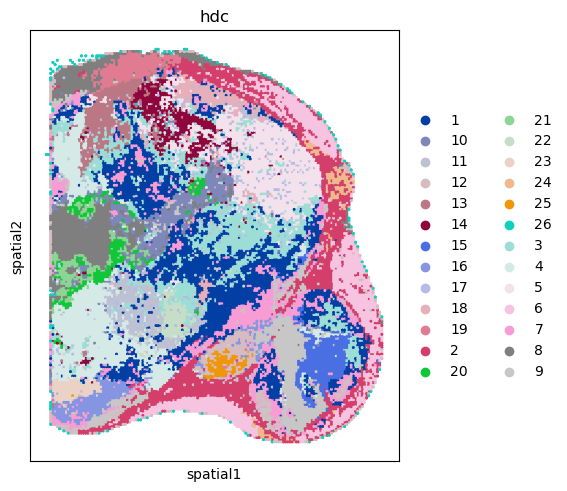

In [44]:
GraphCluster.hdc(rnadata_2, neighbor_b=-1, num_neighbors=100)
sq.pl.spatial_scatter(rnadata_2, color="hdc", shape=None, size=5, library_id="expression")

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:429: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:431: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:434: PerformanceWa

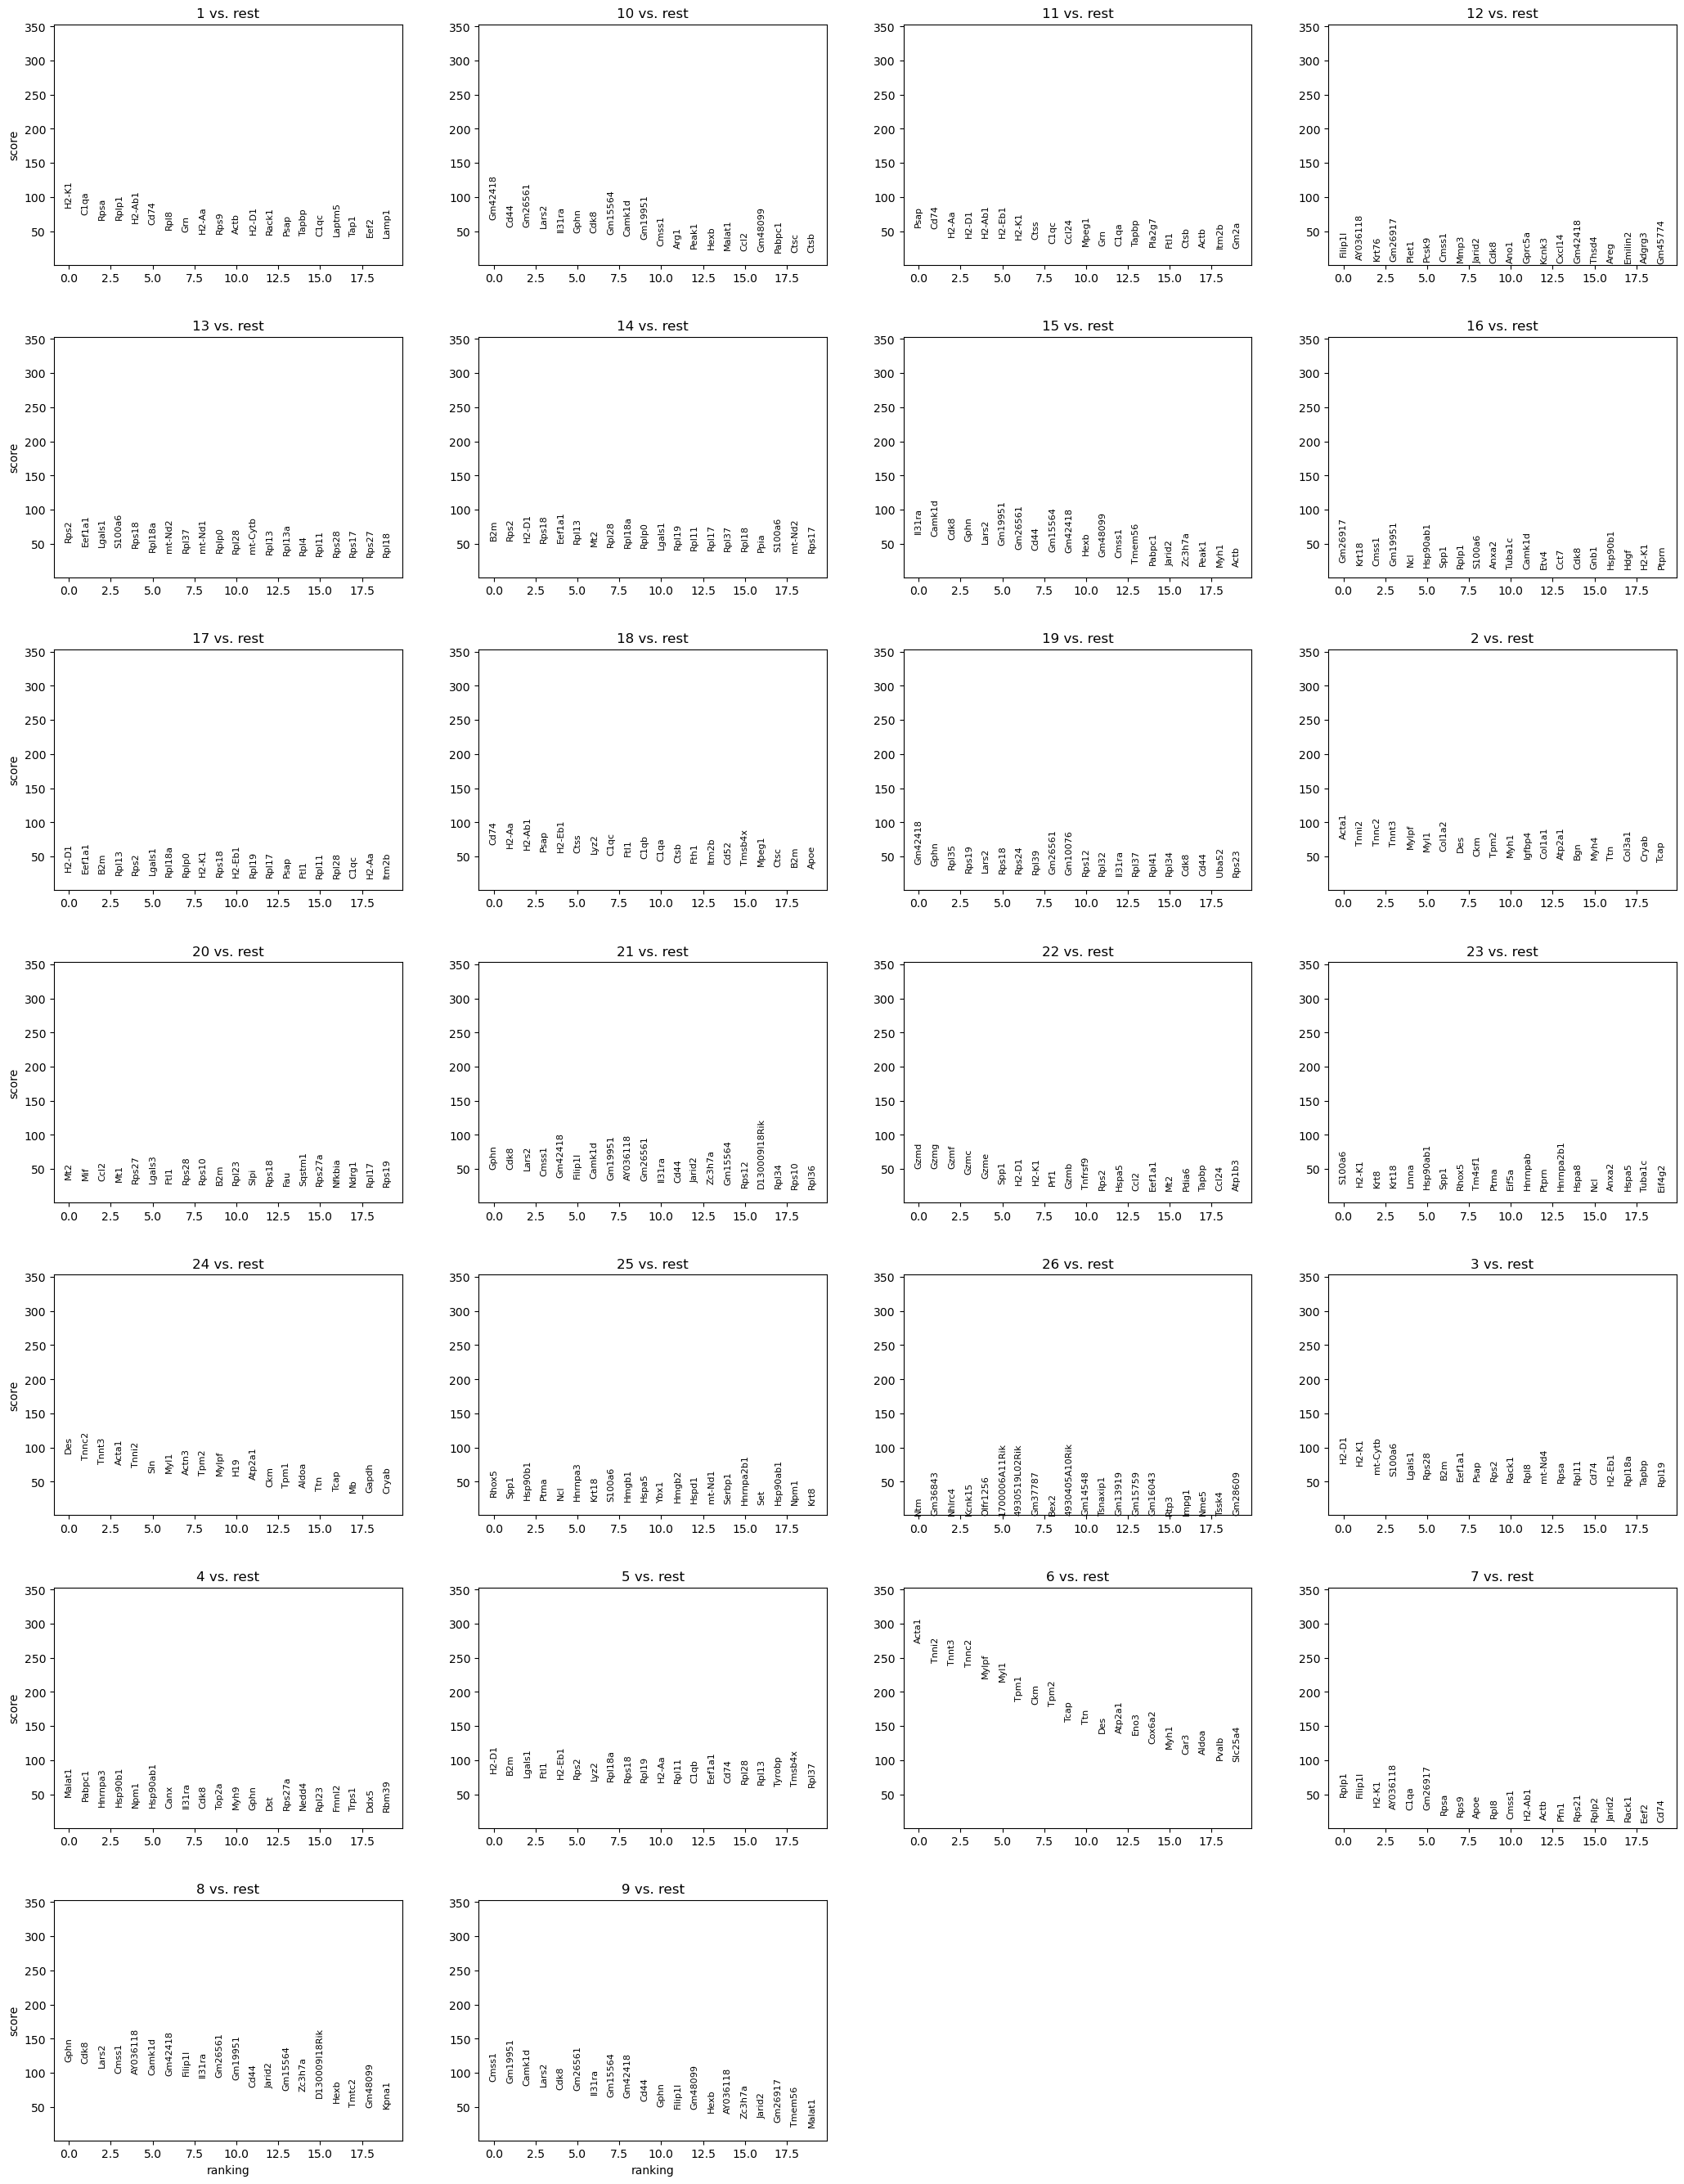

In [45]:
sc.tl.rank_genes_groups(rnadata_2, groupby="hdc", method="t-test")
sc.pl.rank_genes_groups(rnadata_2, n_genes=20)

0.673313
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


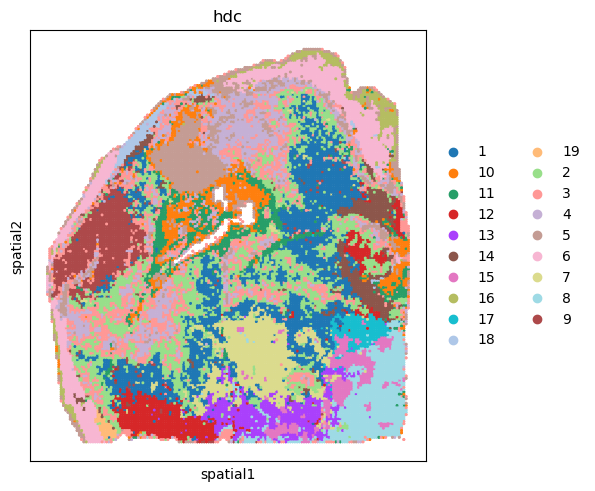

In [46]:
GraphCluster.hdc(rnadata_3, neighbor_b=-1, num_neighbors=100)
sq.pl.spatial_scatter(rnadata_3, color="hdc", shape=None, size=5, library_id="expression")

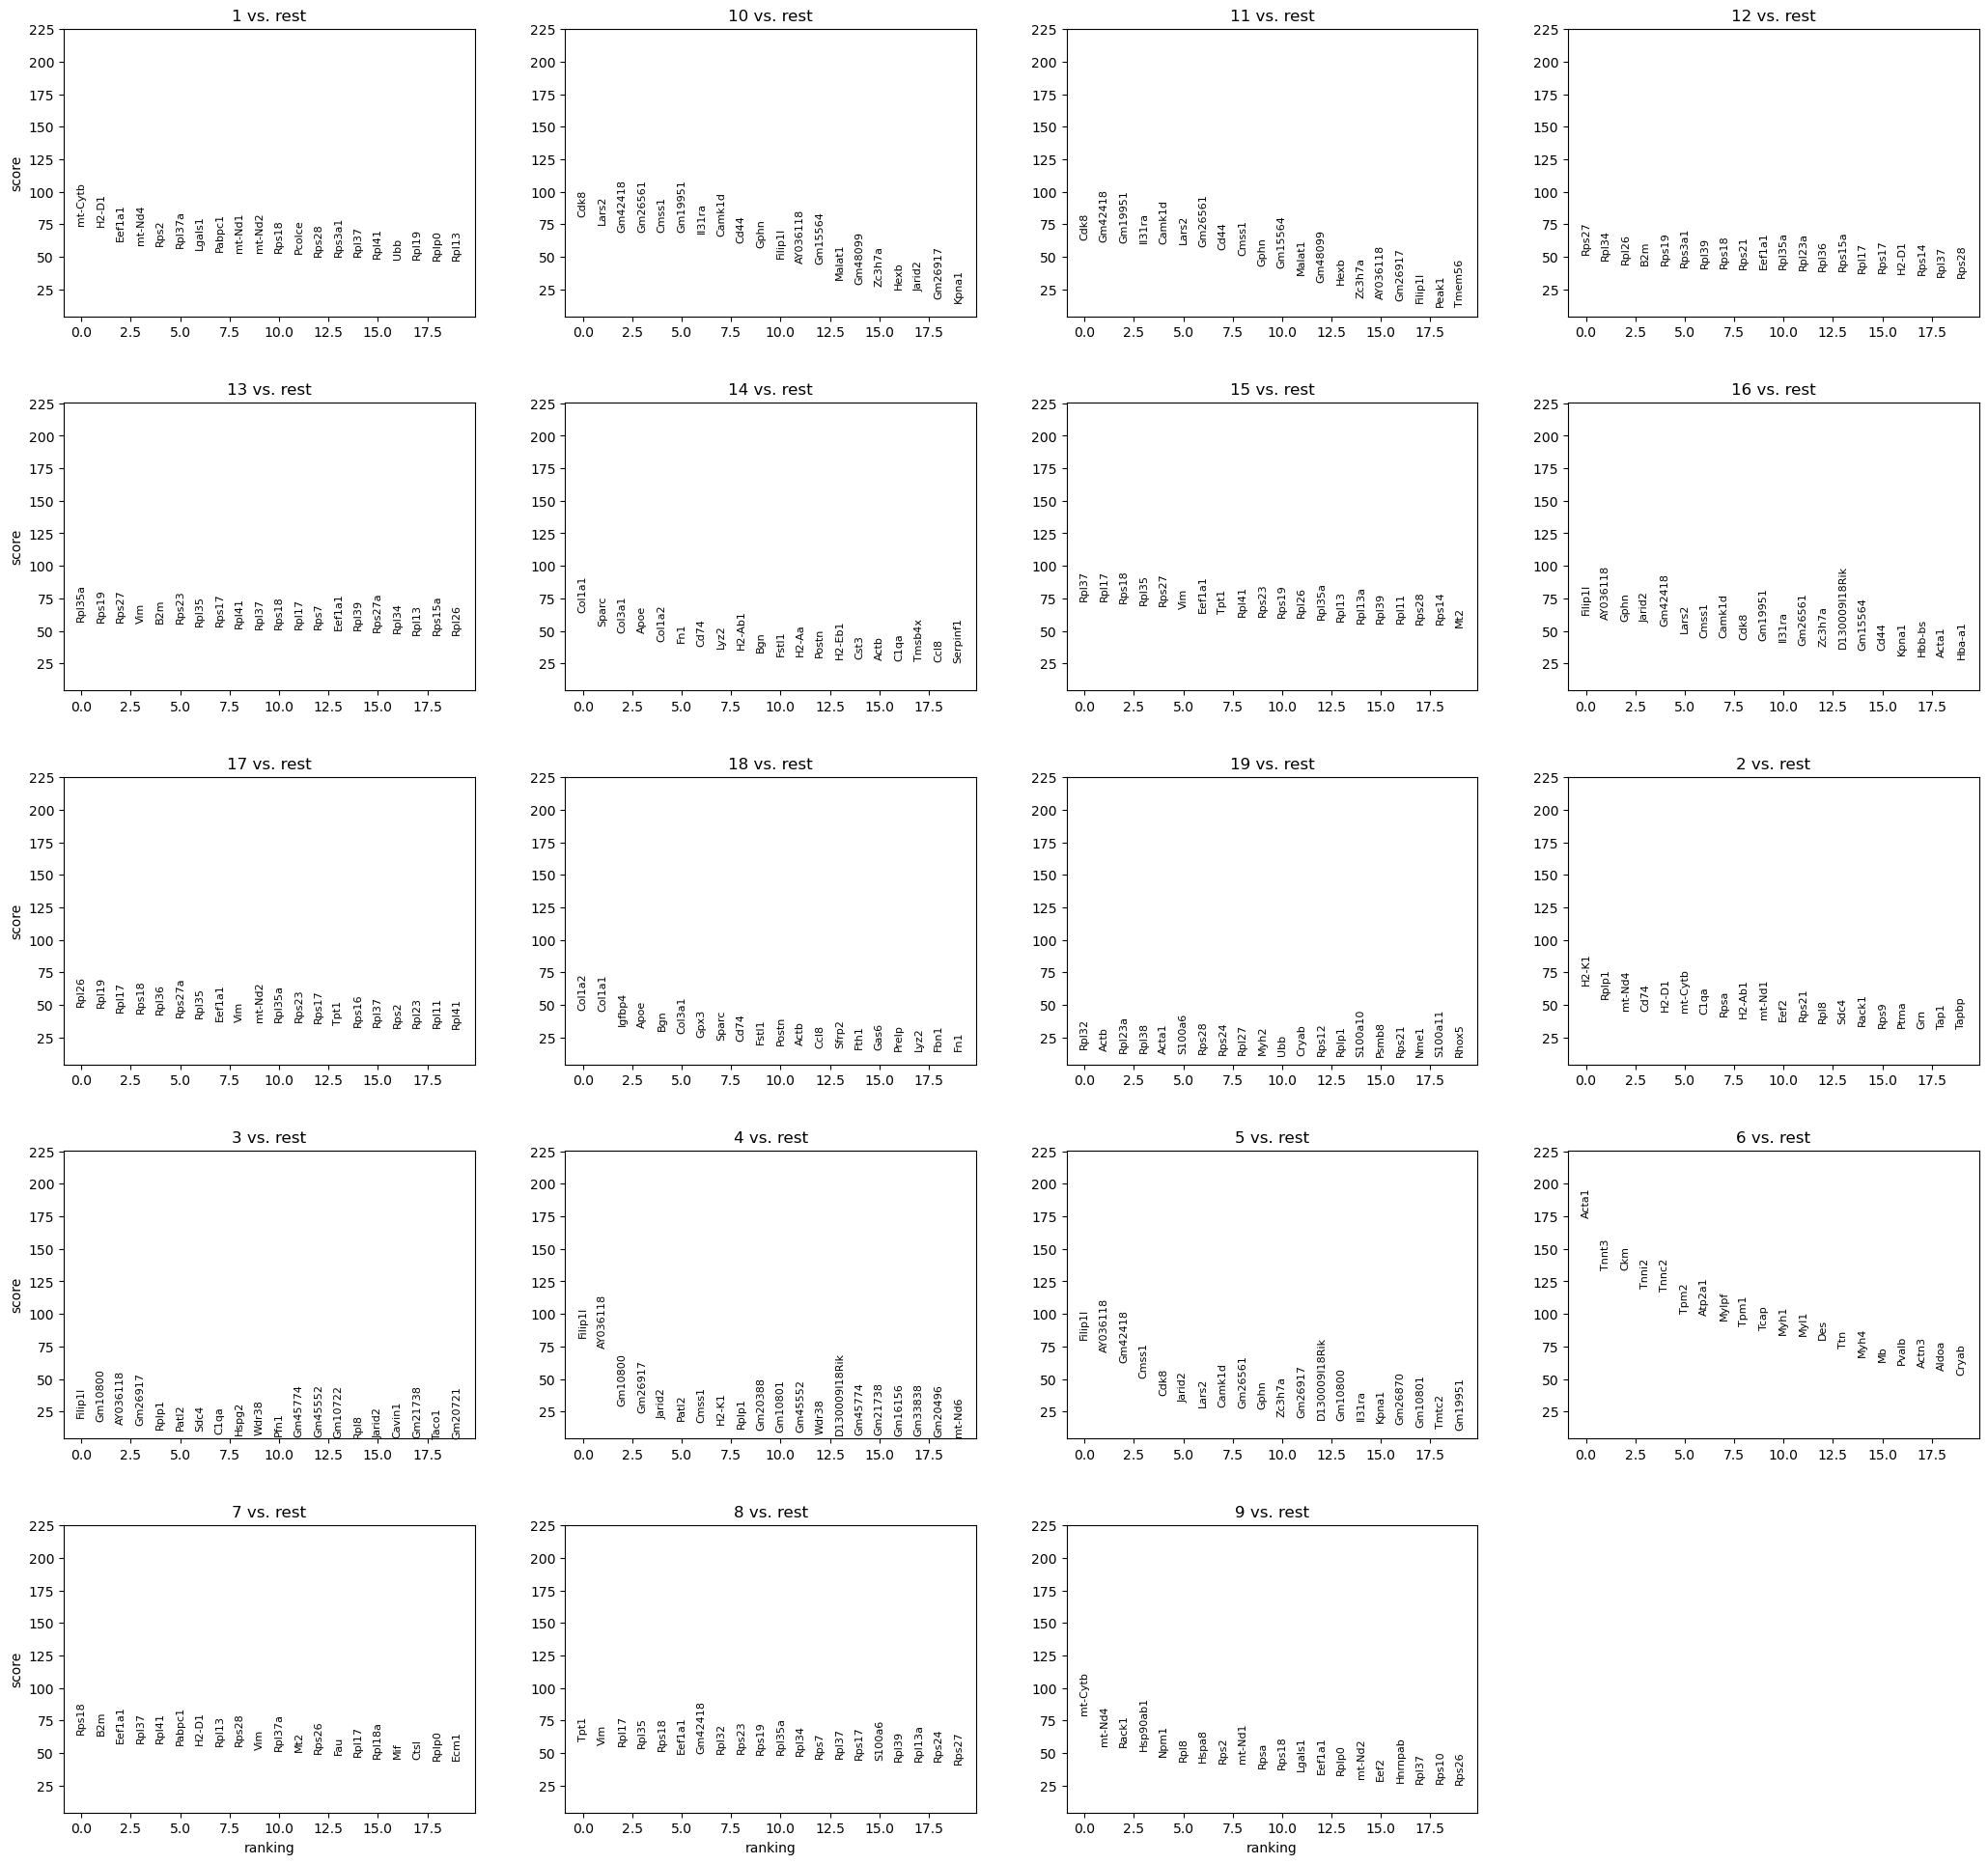

In [47]:
sc.tl.rank_genes_groups(rnadata_3, groupby="hdc", method="t-test")
sc.pl.rank_genes_groups(rnadata_3, n_genes=20)